In [ ]:
# import necessary libraries

from google.colab import drive
import os.path
import tensorflow as tf
import numpy as np
import scipy.io
import math
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import layers, activations
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
!pip -q install pyDOE
from pyDOE import lhs  # for latin hypercube sampling
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# input parameters
Ncl = 100
eps1 = tf.constant(2.3, dtype = tf.complex64)
eps2 = tf.constant(1.0, dtype = tf.complex64)
lamda = 975.1*10**-9
k0 = tf.constant(2*np.pi/lamda, dtype = tf.complex64)

In [ ]:
name = 'gdrive/MyDrive/Colab Notebooks/Dados Brutos/Celula 83 - 10-01-1996.TXT'
if(os.path.isfile(name)):
  f2 = open(name, 'r') 
  lines = f2.readlines()
  x = []
  y = [] 
  for line in lines:
      p = line.split()
      x.append(float(p[0]))
      y.append(float(p[1]))
  f2.close()
  
  angles = np.array(x)
  angles *= np.pi/180
  reflectances = np.array(y)

In [ ]:
# solution neural network
def neural_net(layer_sizes):
    model = Sequential()
    model.add(layers.InputLayer(input_shape=(layer_sizes[0],)))
    for width in layer_sizes[1:-1]:
        model.add(layers.Dense(
            width, activation=tf.nn.tanh,
            kernel_initializer="glorot_normal"))
    model.add(layers.Dense(
            layer_sizes[-1], activation=None,
            kernel_initializer="glorot_normal"))
    return model

# PINN loss function
def loss(xcl,xs,us,param1,param2):
    u_pred  = u_PINN(tf.concat([xs],1))
    r_pred  = r_PINN(xcl,param1,param2)
    # loss components
    mse_s  = tf.reduce_mean(tf.pow(u_pred-us,2))
    mse_r  = tf.reduce_mean(tf.pow(r_pred,2))

    return  mse_s+mse_r

# neural network weight gradients
@tf.function
def grad(model,xcl,xs,us,param1,param2):
    with tf.GradientTape(persistent=True) as tape:
        loss_value = loss(xcl,xs,us,param1,param2)
        grads = tape.gradient(loss_value,model.trainable_variables)
        grad_param1 = tape.gradient(loss_value,param1)
        grad_param2 = tape.gradient(loss_value,param2)
    return loss_value,grads,grad_param1,grad_param2

In [ ]:
# collocation points
X = lhs(1,Ncl)
xlo = 0.733
xhi = 0.750
xcl = tf.expand_dims(tf.convert_to_tensor(xlo+(xhi-xlo)*X[:,0],dtype=tf.float32),-1)
# data points
Ns = len(reflectances)
xs = tf.expand_dims(tf.convert_to_tensor(np.array(x)*np.pi/180.0, dtype = tf.float32),-1)
us = tf.expand_dims(tf.convert_to_tensor(np.array(y), dtype = tf.float32),-1)

iter =  500
loss = 7.9578e-02
epsilon_3 estimate = -26.5691-1.4659j
d estimate = 0.00000184
L2 error: 1.4686e-01


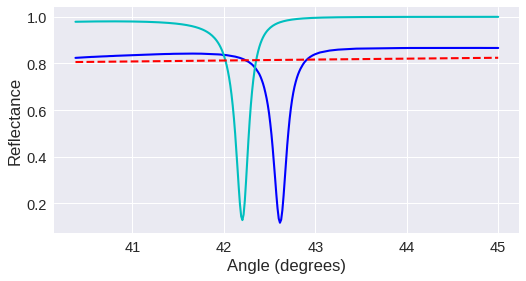

iter =  1000
loss = 6.7855e-02
epsilon_3 estimate = -26.0342-1.4789j
d estimate = 0.00000189
L2 error: 1.4650e-01


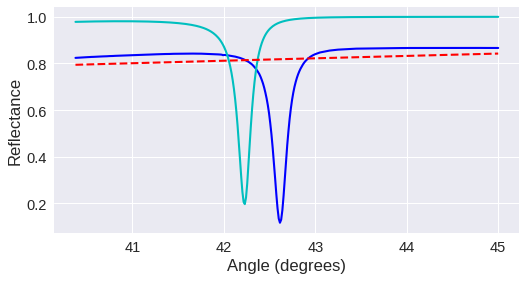

iter =  1500
loss = 5.7163e-02
epsilon_3 estimate = -25.4793-1.5109j
d estimate = 0.00000194
L2 error: 1.5135e-01


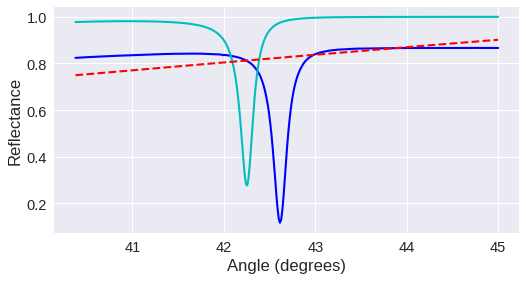

iter =  2000
loss = 4.8986e-02
epsilon_3 estimate = -24.9404-1.5336j
d estimate = 0.00000198
L2 error: 1.5013e-01


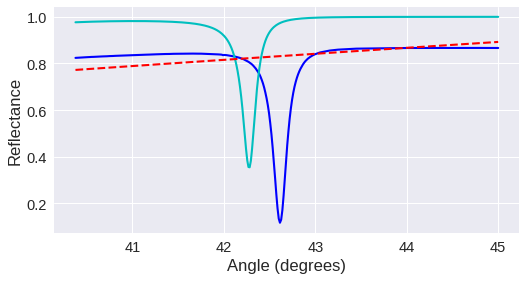

iter =  2500
loss = 4.2553e-02
epsilon_3 estimate = -24.4423-1.5387j
d estimate = 0.00000202
L2 error: 1.5072e-01


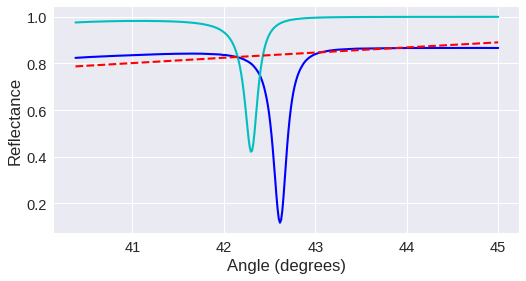

iter =  3000
loss = 3.7730e-02
epsilon_3 estimate = -23.9878-1.5411j
d estimate = 0.00000205
L2 error: 1.5183e-01


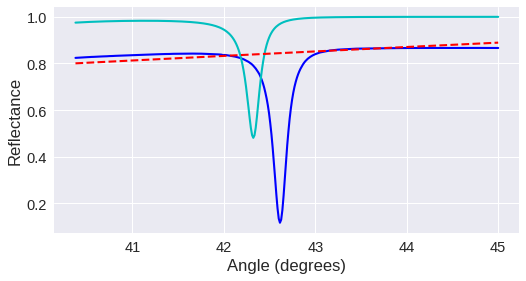

iter =  3500
loss = 3.4191e-02
epsilon_3 estimate = -23.5674-1.5502j
d estimate = 0.00000209
L2 error: 1.5321e-01


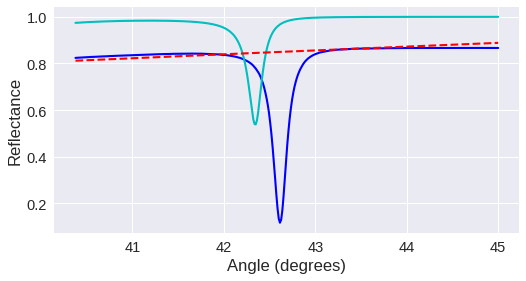

iter =  4000
loss = 3.1585e-02
epsilon_3 estimate = -23.1689-1.5652j
d estimate = 0.00000212
L2 error: 1.5473e-01


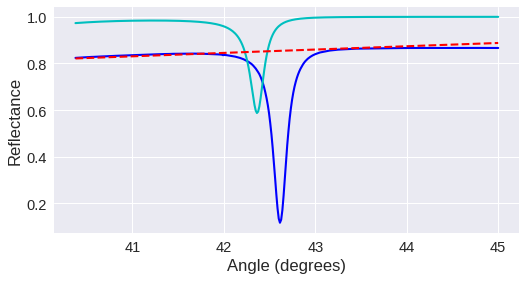

iter =  4500
loss = 2.9664e-02
epsilon_3 estimate = -22.7861-1.5779j
d estimate = 0.00000214
L2 error: 1.5629e-01


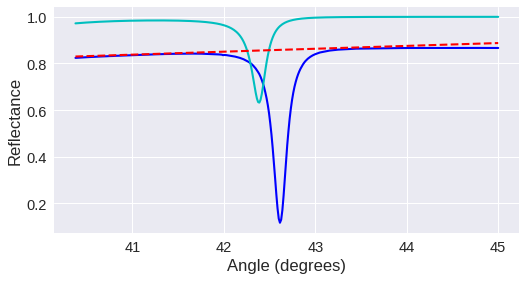

iter =  5000
loss = 2.8274e-02
epsilon_3 estimate = -22.4188-1.5843j
d estimate = 0.00000217
L2 error: 1.5783e-01


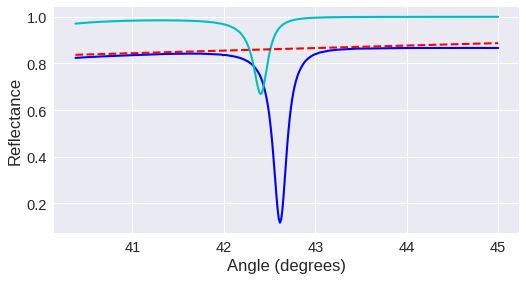

iter =  5500
loss = 2.7286e-02
epsilon_3 estimate = -22.0662-1.5875j
d estimate = 0.00000219
L2 error: 1.5927e-01


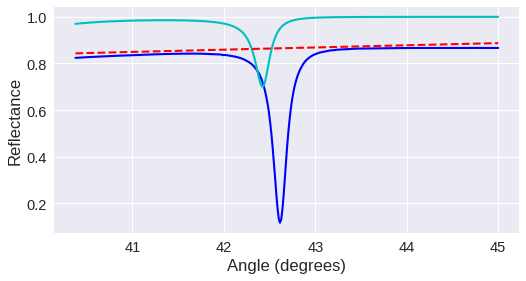

iter =  6000
loss = 2.6585e-02
epsilon_3 estimate = -21.7246-1.5909j
d estimate = 0.00000220
L2 error: 1.6057e-01


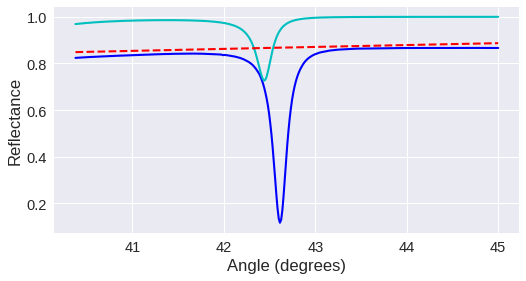

iter =  6500
loss = 2.6085e-02
epsilon_3 estimate = -21.3899-1.5973j
d estimate = 0.00000221
L2 error: 1.6168e-01


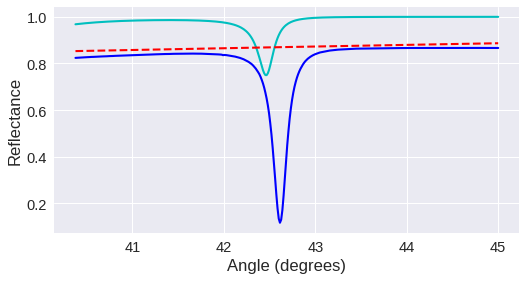

iter =  7000
loss = 2.5712e-02
epsilon_3 estimate = -21.0567-1.6082j
d estimate = 0.00000222
L2 error: 1.6255e-01


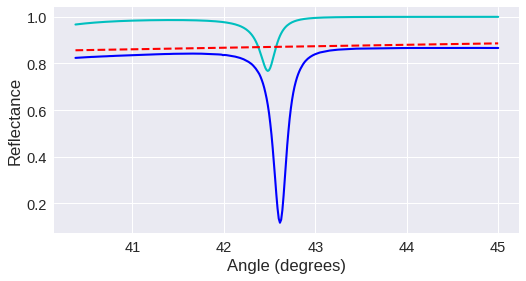

iter =  7500
loss = 2.5403e-02
epsilon_3 estimate = -20.7186-1.6229j
d estimate = 0.00000222
L2 error: 1.6313e-01


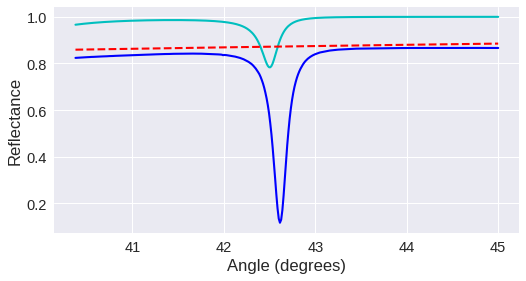

iter =  8000
loss = 2.5097e-02
epsilon_3 estimate = -20.3693-1.6394j
d estimate = 0.00000221
L2 error: 1.6339e-01


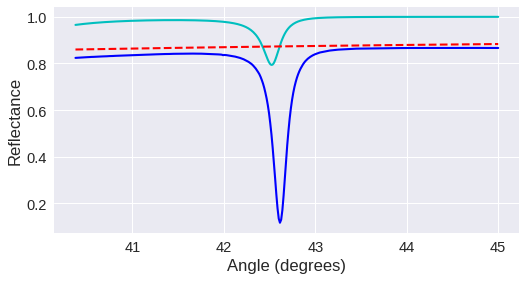

iter =  8500
loss = 2.4529e-02
epsilon_3 estimate = -20.0005-1.6548j
d estimate = 0.00000220
L2 error: 1.6480e-01


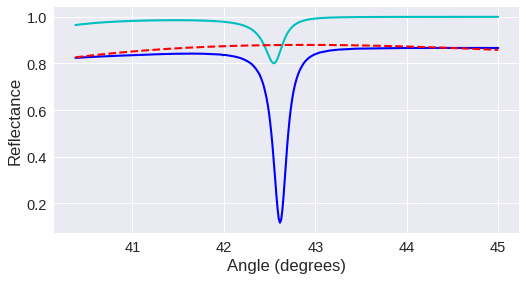

iter =  9000
loss = 2.4166e-02
epsilon_3 estimate = -19.6107-1.6623j
d estimate = 0.00000219
L2 error: 1.6523e-01


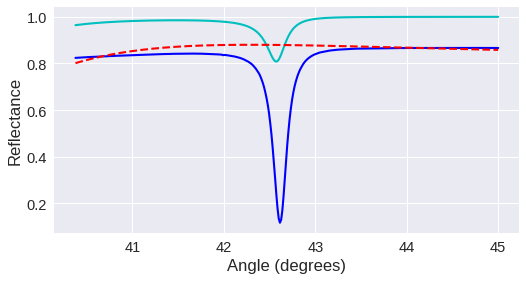

iter =  9500
loss = 2.3738e-02
epsilon_3 estimate = -19.2095-1.6645j
d estimate = 0.00000216
L2 error: 1.6455e-01


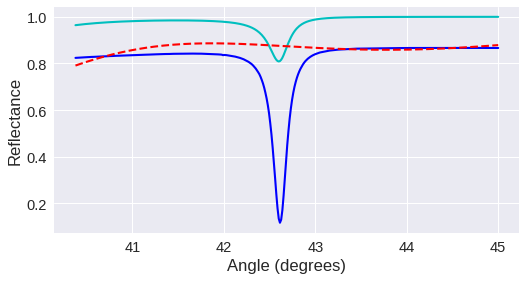

iter =  10000
loss = 2.0941e-02
epsilon_3 estimate = -18.7841-1.6601j
d estimate = 0.00000212
L2 error: 1.5788e-01


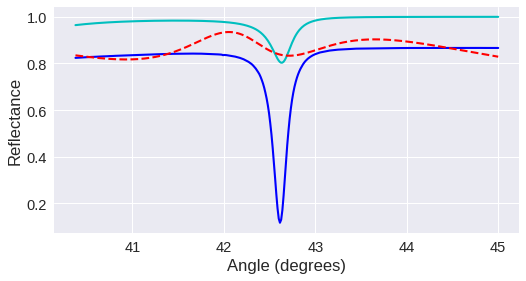

iter =  10500
loss = 1.3393e-02
epsilon_3 estimate = -18.8398-1.7930j
d estimate = 0.00000203
L2 error: 1.2623e-01


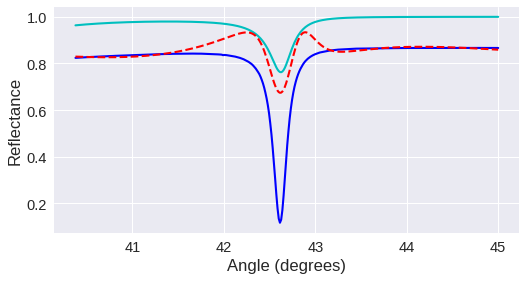

iter =  11000
loss = 1.0833e-02
epsilon_3 estimate = -19.2994-1.8722j
d estimate = 0.00000196
L2 error: 1.1339e-01


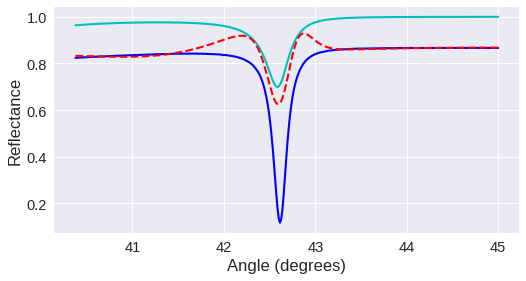

iter =  11500
loss = 8.7134e-03
epsilon_3 estimate = -19.7406-1.7016j
d estimate = 0.00000190
L2 error: 1.0204e-01


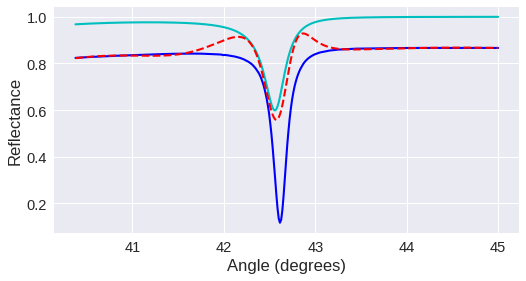

iter =  12000
loss = 6.3504e-03
epsilon_3 estimate = -19.5070-1.1745j
d estimate = 0.00000185
L2 error: 8.1023e-02


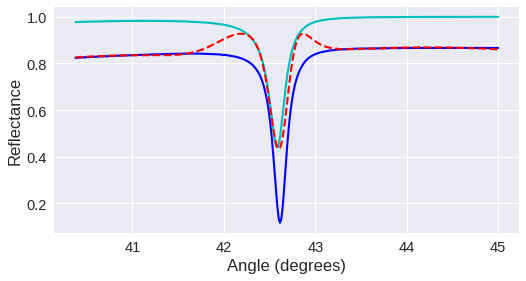

iter =  12500
loss = 4.2119e-03
epsilon_3 estimate = -19.1592-1.1146j
d estimate = 0.00000180
L2 error: 6.9103e-02


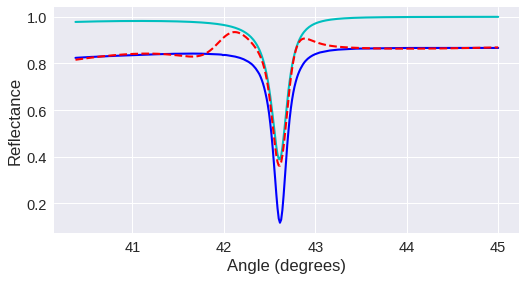

iter =  13000
loss = 3.1026e-03
epsilon_3 estimate = -19.1100-1.1022j
d estimate = 0.00000175
L2 error: 5.8371e-02


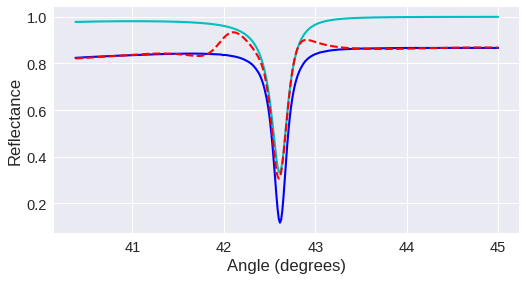

iter =  13500
loss = 2.1477e-03
epsilon_3 estimate = -19.0660-1.1468j
d estimate = 0.00000171
L2 error: 4.8885e-02


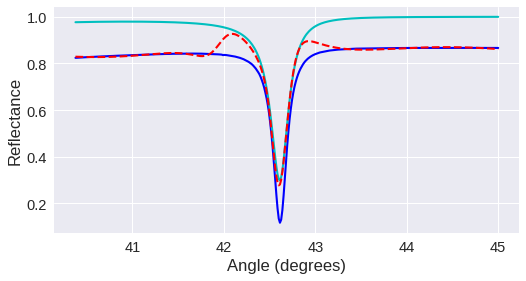

iter =  14000
loss = 1.5939e-03
epsilon_3 estimate = -19.0169-1.1922j
d estimate = 0.00000167
L2 error: 3.9474e-02


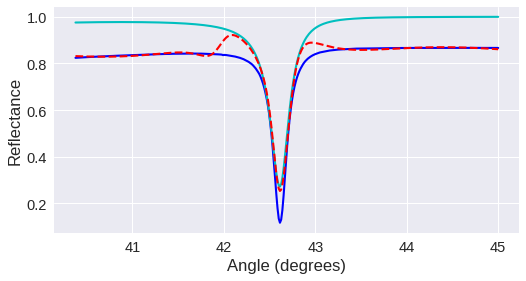

iter =  14500
loss = 1.0635e-03
epsilon_3 estimate = -18.9684-1.2356j
d estimate = 0.00000164
L2 error: 3.3196e-02


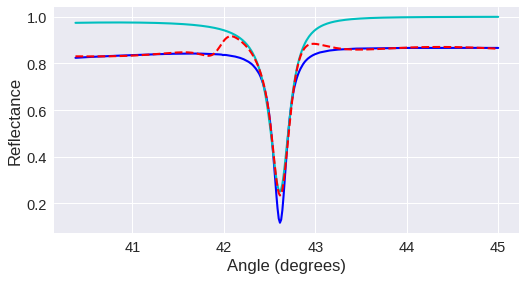

iter =  15000
loss = 8.8921e-04
epsilon_3 estimate = -18.9240-1.2729j
d estimate = 0.00000161
L2 error: 3.0368e-02


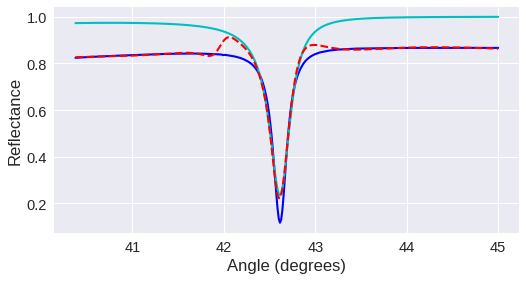

iter =  15500
loss = 6.9864e-04
epsilon_3 estimate = -18.8877-1.3013j
d estimate = 0.00000159
L2 error: 2.7864e-02


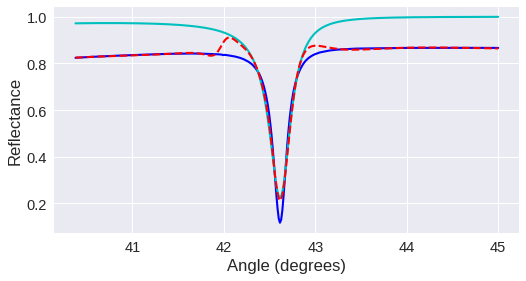

iter =  16000
loss = 7.5232e-04
epsilon_3 estimate = -18.8621-1.3203j
d estimate = 0.00000158
L2 error: 2.7866e-02


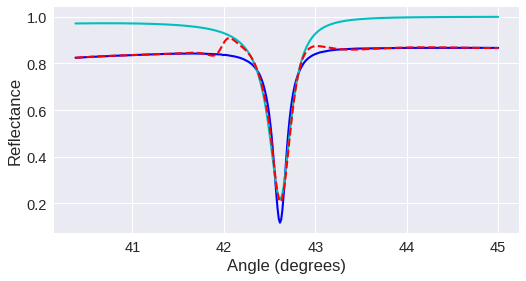

iter =  16500
loss = 7.2131e-04
epsilon_3 estimate = -18.8472-1.3318j
d estimate = 0.00000158
L2 error: 2.7362e-02


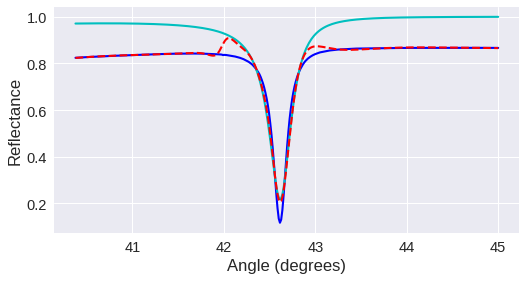

iter =  17000
loss = 7.8578e-04
epsilon_3 estimate = -18.8402-1.3386j
d estimate = 0.00000158
L2 error: 2.7606e-02


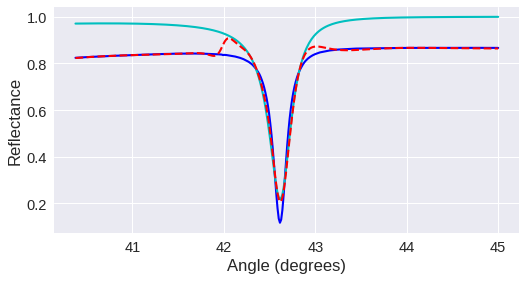

iter =  17500
loss = 6.6594e-04
epsilon_3 estimate = -18.8374-1.3415j
d estimate = 0.00000158
L2 error: 2.7433e-02


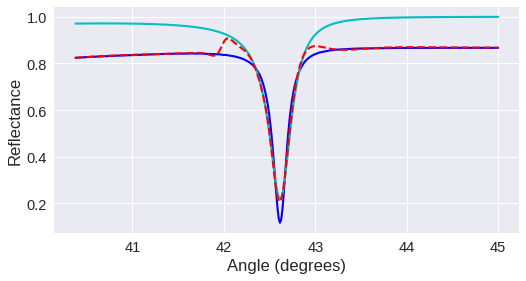

iter =  18000
loss = 7.6434e-04
epsilon_3 estimate = -18.8364-1.3447j
d estimate = 0.00000158
L2 error: 2.7896e-02


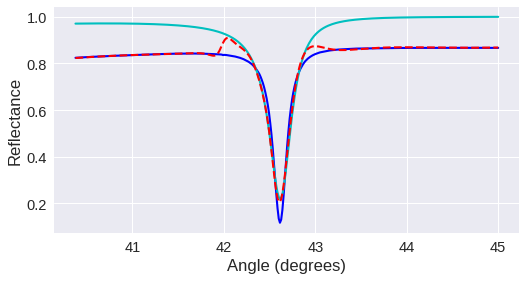

iter =  18500
loss = 7.0014e-04
epsilon_3 estimate = -18.8359-1.3458j
d estimate = 0.00000158
L2 error: 2.7269e-02


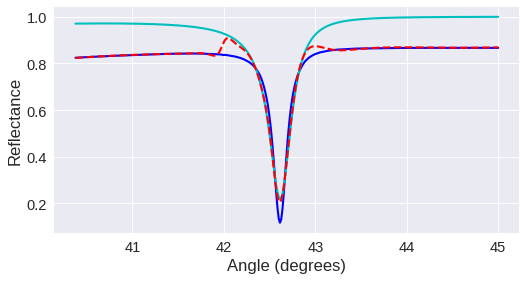

iter =  19000
loss = 7.8390e-04
epsilon_3 estimate = -18.8358-1.3451j
d estimate = 0.00000158
L2 error: 2.8485e-02


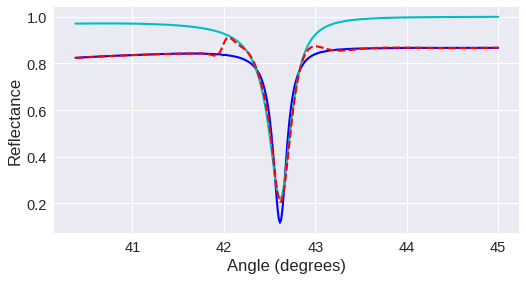

iter =  19500
loss = 6.9805e-04
epsilon_3 estimate = -18.8360-1.3466j
d estimate = 0.00000158
L2 error: 2.7679e-02


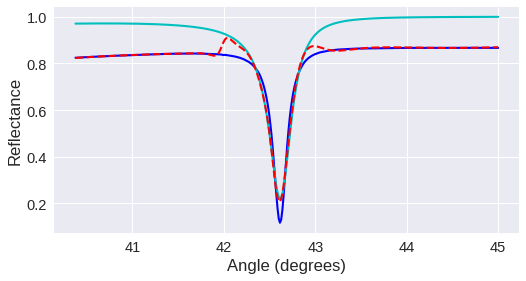

iter =  20000
loss = 6.4144e-04
epsilon_3 estimate = -18.8363-1.3453j
d estimate = 0.00000158
L2 error: 2.7169e-02


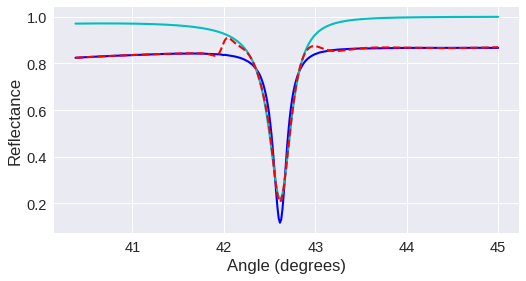

In [ ]:
# training loop

# initialize new instance of NN
layer_sizes = [1] + 3*[20] + [1]
u_PINN = neural_net(layer_sizes)

# residual neural network
@tf.function
def r_PINN(x,eps3,param2):
    u = u_PINN(tf.concat([x], 1))
    k1 = k0*tf.sqrt(eps1 - eps1*tf.cast(tf.pow(tf.sin(x),2), dtype = tf.complex64))
    k2 = k0*tf.sqrt(eps2 - eps1*tf.cast(tf.pow(tf.sin(x),2), dtype = tf.complex64))
    k3 = k0*tf.sqrt(eps3 - eps1*tf.cast(tf.pow(tf.sin(x),2), dtype = tf.complex64))
    r12 = (eps2*k1 - eps1*k2)/(eps2*k1 + eps1*k2)
    r23 = (eps3*k2 - eps2*k3)/(eps3*k2 + eps2*k3)
    d = tf.cast(param2, dtype = tf.complex64)
    R = tf.cast(tf.pow(tf.abs((r12 + r23*tf.exp(-2j*k2*d))/(1 + r12*r23*tf.exp(-2j*k2*d))),2), dtype = tf.float32)
    return u - R

# initialize parameter estimate
param1 = tf.Variable(-27-1.5j,trainable=True,dtype=tf.complex64)
param2 = tf.Variable(1.8*10**-6,trainable=True,dtype=tf.float32)

# Adam optimizer for neural network weights and parameter
tf_optimizer = tf.keras.optimizers.Adam(learning_rate=0.01,beta_1=0.99)
tf_optimizer_param1 = tf.keras.optimizers.Adam(learning_rate=1.0e-3,beta_1=0.99)
tf_optimizer_param2 = tf.keras.optimizers.Adam(learning_rate=1.0e-10,beta_1=0.99)

X_flat = xs
u_flat = us
norm_u = np.linalg.norm(u_flat,2)
ux = xs*180.0/np.pi

for iter in range(20000):

  # compute gradients using AD
  loss_value,grads,grad_param1,grad_param2 = grad(u_PINN,xcl,xs,us,param1,param2)

  # update neural network weights
  tf_optimizer.apply_gradients(zip(grads,u_PINN.trainable_variables))  

  # update parameter estimate
  tf_optimizer_param1.apply_gradients(zip([grad_param1],[param1]))
  tf_optimizer_param2.apply_gradients(zip([grad_param2],[param2]))

  # display intermediate results  
  if ((iter+1) % 500 == 0):
    print('iter =  '+str(iter+1))
    print('loss = %.4e' % loss_value)
    print('epsilon_3 estimate = {:.4f}'.format(param1.numpy()))
    print('d estimate = {:.8f}'.format(param2.numpy()))
    u_PINN_flat = u_PINN(X_flat)
    err = np.linalg.norm(u_flat-u_PINN_flat,2)/norm_u
    print('L2 error: %.4e' % (err))

    x = xs
    eps3 = param1
    k1 = k0*tf.sqrt(eps1 - eps1*tf.cast(tf.pow(tf.sin(x),2), dtype = tf.complex64))
    k2 = k0*tf.sqrt(eps2 - eps1*tf.cast(tf.pow(tf.sin(x),2), dtype = tf.complex64))
    k3 = k0*tf.sqrt(eps3 - eps1*tf.cast(tf.pow(tf.sin(x),2), dtype = tf.complex64))
    r12 = (eps2*k1 - eps1*k2)/(eps2*k1 + eps1*k2)
    r23 = (eps3*k2 - eps2*k3)/(eps3*k2 + eps2*k3)
    d = tf.cast(param2, dtype = tf.complex64)
    R = tf.cast(tf.pow(tf.abs((r12 + r23*tf.exp(-2j*k2*d))/(1 + r12*r23*tf.exp(-2j*k2*d))),2), dtype = tf.float32)

    fig = plt.figure(figsize=(8,4),dpi=75)
    plt.style.use('seaborn')
    plt.plot(ux,u_flat,'b-',linewidth=2,label='Data')
    plt.plot(ux,R,'c-',linewidth=2,label='Theoretical')       
    plt.plot(ux,u_PINN_flat,'r--',linewidth=2,label='Prediction')
    plt.xlabel('Angle (degrees)',fontsize = 16)
    plt.ylabel('Reflectance',fontsize = 16)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()